# HDR Plot

The *El Niño* dataset consists of 60 years worth of averaged monthly sea surface temperature (SST) in degrees Celcius of the Pacific Ocean at 0-10 deg South and 90-80 deg West between 1950 and 2007.
Years 1982-83 and 1997-98 are outliers; these are the years where *El Niño* (a climate pattern characterized by warming up of the sea surface and higher air pressures) occurred with unusual intensity.

Source: NOAA - ERSSTv5 - Nino 1+2 at http://www.cpc.ncep.noaa.gov/data/indices/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import openturns as ot
from othdrplot import ProcessHighDensityRegionAlgorithm

# Configure OT
n_samples = 500
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetBySampling', 'true')
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetSamplingSize', str(n_samples))

# Load the dataset
fname = os.path.join(os.path.abspath(''), '../../tests/data/npfda-elnino.dat')
data = np.loadtxt(fname)
print(data)

[[21.7  20.74 20.52 19.82 20.19 20.46 21.92 25.13 25.44 25.9  25.29 24.9 ]
 [24.56 24.04 22.43 21.52 22.2  22.9  23.01 24.47 26.42 26.51 24.54 23.69]
 [22.35 20.74 19.95 20.12 20.45 20.72 22.53 24.19 26.33 27.21 26.85 25.24]
 [23.74 22.45 21.68 21.49 21.08 22.07 22.47 23.06 25.22 25.83 23.05 21.79]
 [21.02 19.89 19.78 19.23 19.2  20.47 21.25 23.7  24.64 25.51 24.34 22.53]
 [21.12 20.56 19.75 19.47 19.35 20.   21.1  23.67 24.78 25.76 25.06 23.3 ]
 [22.29 21.62 20.66 19.98 19.84 20.86 21.6  23.25 26.32 27.47 26.86 26.29]
 [24.92 23.82 22.33 21.88 21.76 22.4  23.75 24.96 26.74 27.07 26.45 25.08]
 [23.04 22.38 20.56 20.72 20.96 21.64 22.47 24.09 25.68 27.07 25.89 24.26]
 [22.63 21.45 20.34 20.41 20.91 21.99 22.69 24.57 25.72 26.15 24.72 23.76]
 [22.15 21.01 20.37 20.54 20.22 20.91 22.74 24.45 26.55 25.91 24.97 23.71]
 [22.39 20.55 19.96 19.75 20.   21.07 22.06 24.11 25.55 24.63 23.57 23.48]
 [21.85 20.57 20.37 20.16 19.92 20.88 21.83 24.11 25.36 25.88 24.54 24.17]
 [22.6  22.01 21.45 21.15

In [2]:
# Create the mesh
n_nodes = data.shape[1]
mesher = ot.IntervalMesher([n_nodes - 1])
interval = ot.Interval([0.0], [1.0])
mesh = mesher.build(interval)
mesh.draw()

# Create the ProcessSample from the data
n_fields = data.shape[0]
d_fields = 1
sample = ot.ProcessSample(mesh, n_fields, d_fields)
for i in range(n_fields):
    trajectory = ot.Sample(data[i, :], 1)
    sample[i] = ot.Field(mesh, trajectory)

print(sample)

[field 0:
 0 : [  0         21.7       ]
 1 : [  0.0909091 20.74      ]
 2 : [  0.181818  20.52      ]
 3 : [  0.272727  19.82      ]
 4 : [  0.363636  20.19      ]
 5 : [  0.454545  20.46      ]
 6 : [  0.545455  21.92      ]
 7 : [  0.636364  25.13      ]
 8 : [  0.727273  25.44      ]
 9 : [  0.818182  25.9       ]
10 : [  0.909091  25.29      ]
11 : [  1         24.9       ]
field 1:
 0 : [  0         24.56      ]
 1 : [  0.0909091 24.04      ]
 2 : [  0.181818  22.43      ]
 3 : [  0.272727  21.52      ]
 4 : [  0.363636  22.2       ]
 5 : [  0.454545  22.9       ]
 6 : [  0.545455  23.01      ]
 7 : [  0.636364  24.47      ]
 8 : [  0.727273  26.42      ]
 9 : [  0.818182  26.51      ]
10 : [  0.909091  24.54      ]
11 : [  1         23.69      ]
field 2:
 0 : [  0         22.35      ]
 1 : [  0.0909091 20.74      ]
 2 : [  0.181818  19.95      ]
 3 : [  0.272727  20.12      ]
 4 : [  0.363636  20.45      ]
 5 : [  0.454545  20.72      ]
 6 : [  0.545455  22.53      ]
 7 : [  0.6

Number of trajectories = 54
Number of vertices = 12
Number of components : 2
Part of variance : 0.8657
Explained variance ratio : [0.607596,0.258102]


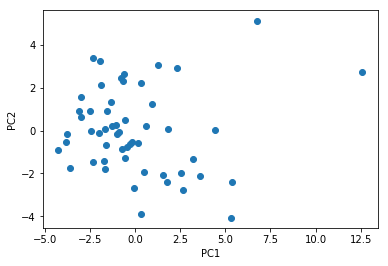

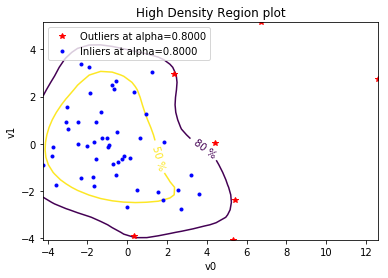

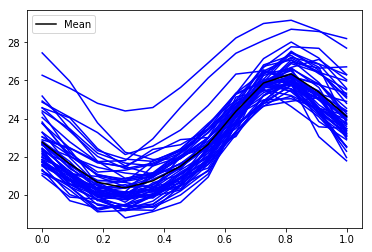

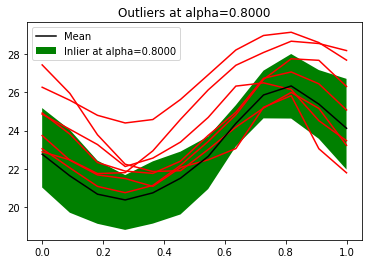

Outliers trajectories at alpha=0.8000
[ 3  7 22 32 33 41 47]


In [3]:
# Compute HDRPlot
hdr = ProcessHighDensityRegionAlgorithm(sample)
hdr.setContoursAlpha([0.8, 0.5])
hdr.setOutlierAlpha(0.8)
hdr.run()
hdr.summary()
hdr.dimensionReductionSummary()

# Plot ACP
hdr.plotDimensionReduction()
plt.show()

# Plot Density
hdr.plotDensity(plotData=True, plotOutliers=True)
plt.show()

# Plot trajectories
hdr.plotTrajectories()
plt.show()

# Plot outlier trajectories
inlierSample = hdr.plotOutlierTrajectories()
plt.show()

print("Outliers trajectories at alpha=%.4f" % (hdr.densityPlot.outlierAlpha))
outlierIndices = hdr.computeOutlierIndices()
print(outlierIndices)